In [ ]:
!pip install insightface

In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image 

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


ImportError: cannot import name 'FaceAnaalysis' from 'insightface.app' (c:\Users\NSSK\anaconda3\envs\work39\lib\site-packages\insightface\app\__init__.py)

In [42]:
print(insightface.__version__)

0.7.3


Detect Faces

In [43]:
app = FaceAnalysis()
app.prepare(ctx_id = -1, det_size = (640,640))

c:\Users\NSSK\AppData\Local\Programs\Python\Python39\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

In [44]:
app=FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id = 0, det_size = (640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\NSSK/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

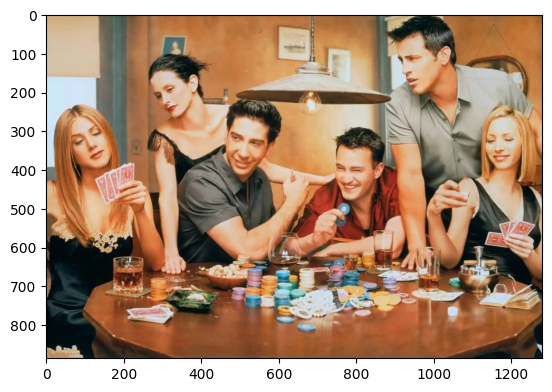

In [45]:
img=ins_get_image('t1')
#img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])
plt.show()

In [46]:
faces = app.get(img)

crop and plot faces

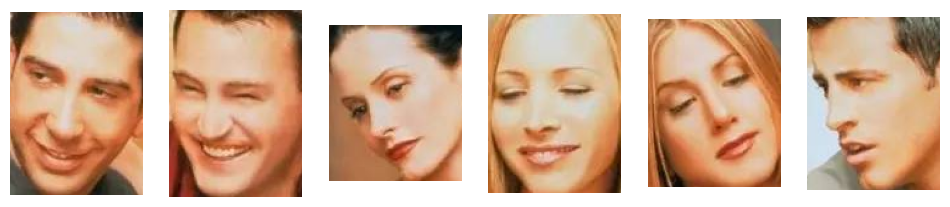

In [47]:
fig,axis = plt.subplots(1,6,figsize=(12,5))
for i,face in enumerate(faces):
    bbox = face['bbox']
    bbox=[int(b) for b in bbox]
    axis[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axis[i].axis('off')


Swapping

In [48]:
swapper = insightface.model_zoo.get_model("C:/Users/NSSK/Downloads/insight/inswapper_128.onnx",download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


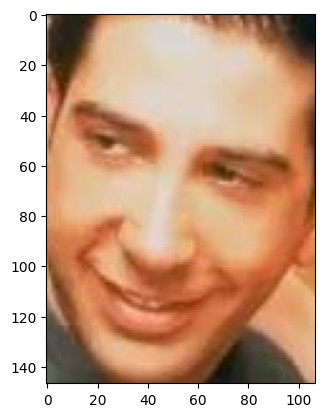

In [49]:
source_face = faces[0]
bbox = source_face['bbox']
bbox=[int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [50]:
res =img.copy()
ax=[]
for face in faces:
    res = swapper.get(res,face,source_face,paste_back=True)
    ax.append(res)

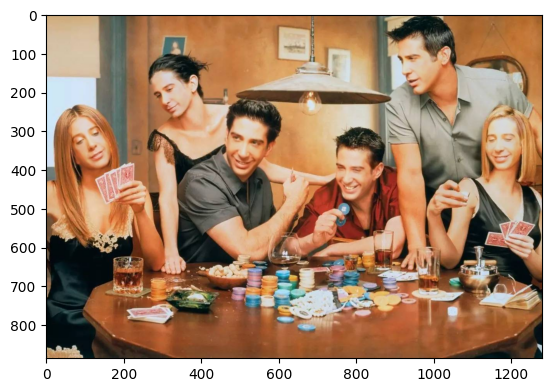

In [51]:
plt.imshow(res[:,:,::-1])
plt.show()

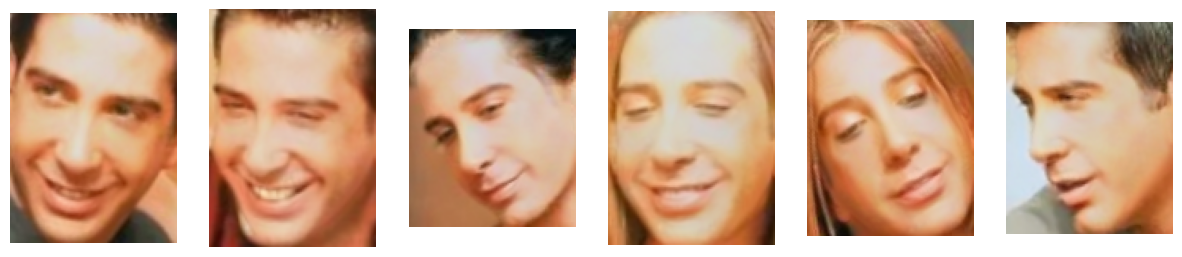

In [52]:
faces = app.get(res)
fig,axis = plt.subplots(1,6,figsize=(15,15))
for i,face in enumerate(faces):
    bbox = face['bbox']
    bbox=[int(b) for b in bbox]
    axis[i].imshow(res[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axis[i].axis('off')

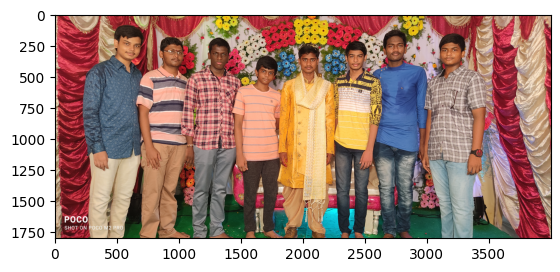

In [53]:
lok=cv2.imread('lokesh.jpg')
grp=cv2.imread('group.jpg')
plt.imshow(grp[:,:,::-1])
plt.show()

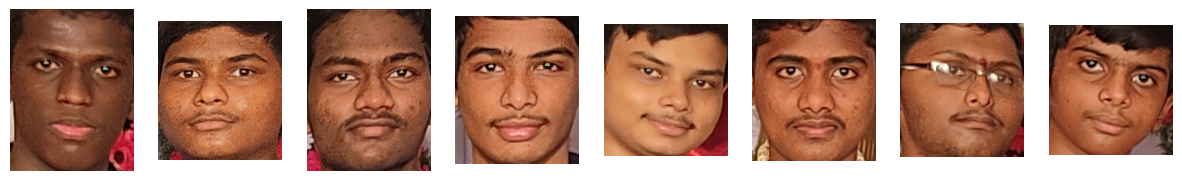

In [54]:
lok_faces = app.get(lok)
faces=app.get(grp)
#plot faces
fig,axis = plt.subplots(1,8,figsize=(15,15))
for i,face in enumerate(faces):
    bbox = face['bbox']
    bbox=[int(b) for b in bbox]
    axis[i].imshow(grp[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axis[i].axis('off')



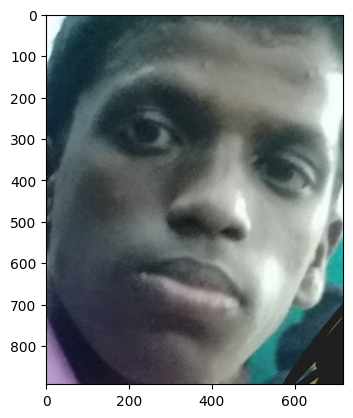

In [55]:
#plot lokesh faces[4]
bbox = lok_faces[0]['bbox']
bbox=[int(b) for b in bbox]
plt.imshow(lok[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()
#fig,axis = plt.subplots(1,6,figsize=(15,15))


In [56]:
group = grp.copy()
for face in faces:
    group = swapper.get(group,face,lok_faces[0],paste_back=True)

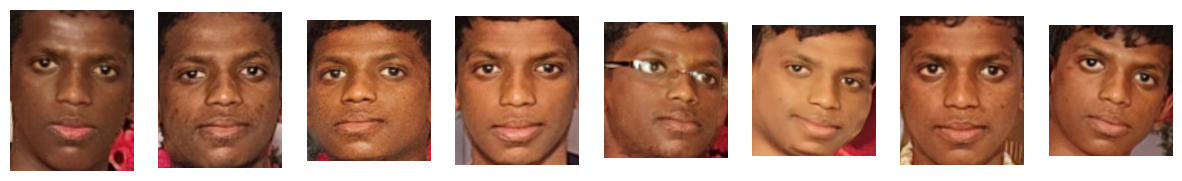

In [57]:
group_f=app.get(group)
fig,axis = plt.subplots(1,8,figsize=(15,15))
for i,face in enumerate(group_f):
    bbox = face['bbox']
    bbox=[int(b) for b in bbox]
    axis[i].imshow(group[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axis[i].axis('off')

In [58]:
#save the image group
def face_swap(source,target,save_path):
    faces = app.get(source)
    target_faces = app.get(target)
    res = source.copy()
    for face in target_faces:
        res = swapper.get(res,face,faces[0],paste_back=True)
    cv2.imwrite(save_path,res[:,:,::-1])
    return res


In [74]:
source_face = cv2.imread('lokesh.jpg')
lok_faces = app.get(source_face)
loki=lok_faces[0]
i=1
for img_path in glob.glob('C:/Users/NSSK/Downloads/wi/wim/*.jpg'):
    target_face = cv2.imread(img_path)
    faces = app.get(target_face)
    res = target_face.copy()
    for face in faces:
        res = swapper.get(res,face,loki,paste_back=True)
    #convert res to bgr
    im=cv2.cvtColor(res[:,:,::-1], cv2.COLOR_BGR2RGB)
    cv2.imwrite('C:/Users/NSSK/Downloads/wi/wim_swap/'+str(i)+'.jpg',im)
    i+=1

c:\Users\NSSK\AppData\Local\Programs\Python\Python39\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


IndexError: index 50 is out of bounds for axis 0 with size 50

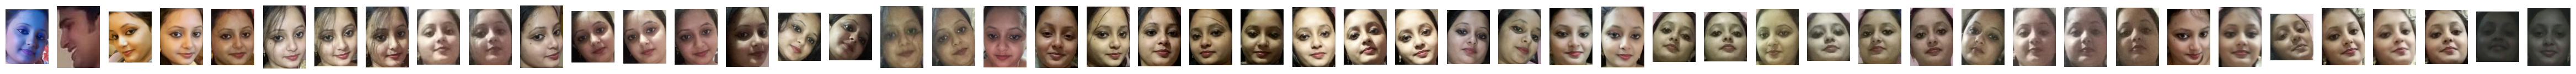

In [60]:
#show images in the folder "C:/Users/NSSK/Downloads/wi/wim" using matplotlib with actual size of each image
#get faces in each image

fig,axis = plt.subplots(1,50,figsize=(60,60))
for i,img_path in enumerate(glob.glob("C:/Users/NSSK/Downloads/wi/wim/*.jpg")):
    target_face = cv2.imread(img_path)
    target_faces = app.get(target_face)
    bbox = target_faces[0]['bbox']
    bbox=[int(b) for b in bbox]
    axis[i].imshow(target_face[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axis[i].axis('off')


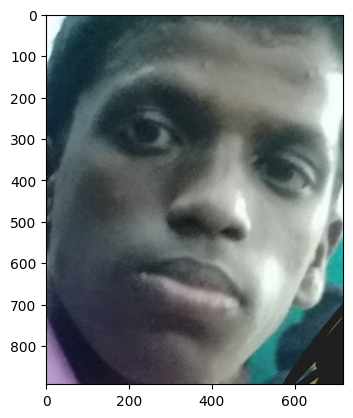

In [61]:
source_face = cv2.imread('lokesh.jpg')
lok_faces = app.get(source_face)
#show the face
bbox = lok_faces[0]['bbox']
bbox=[int(b) for b in bbox]
plt.imshow(source_face[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

# Complete code to detect faces, crop them, and swap faces between two images

```python ```

In [ ]:
import insightface
import cv2

# Load the face-swapping model
# change path to 'C:\Users\NSSK\Desktop\FACESWAP\face_swap(insight_face)\face_swap_fastapi\app\inswapper_128.onnx' if you are using windows
# using os get the full path of inswapper_128.onnx which is in current directory
import os
model_path = os.path.join(os.path.dirname(__file__), 'inswapper_128.onnx')
swapper = insightface.model_zoo.get_model(model_path,download=False, download_zip=False)
def swap_faces(source_path, target_path, target_face_index):
    # Load source and target images
    source_img = cv2.imread(source_path)
    target_img = cv2.imread(target_path)

    # Initialize face analysis
    app = insightface.app.FaceAnalysis()
    app.prepare(ctx_id=0, det_size=(640, 640))

    source_faces = app.get(source_img)
    target_faces = app.get(target_img)

    # Check if the specified index is valid
    if target_face_index < 0 or target_face_index >= len(target_faces):
        raise ValueError("Invalid target face index")

    # Perform face swapping
    result_img = target_img.copy()
    target_face = target_faces[target_face_index]
    result_img = swapper.get(result_img, target_face, source_faces[0], paste_back=True)

    result_path = './result.jpg'
    cv2.imwrite(result_path, result_img)
    return result_path